In [ ]:
#Import samplemissing.csv file and show the top five rows of the dataset
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/STAT_312/Homework/samplemissing.csv')
df.head()

,ID,AGE,SEX,REGION,INCOME,MARRIED,CHILDREN,CAR
0,ID12701,23,MALE,INNER_CITY,18766.0,YES,1,YES
1,ID12702,30,NaN,RURAL,9915.0,NO,2,NO
2,ID12703,45,MALE,RURAL,21881.0,NO,0,YES
3,ID12704,50,MALE,TOWN,NaN,YES,2,NO
4,ID12705,41,FEMALE,INNER_CITY,80000.0,YES,0,NO


In [ ]:
#Find out data types for each variable

print(type('ID'))
print(type('AGE'))
print(type('SEX'))
print(type('REGION'))
print(type('INCOME'))
print(type('MARRIED'))
print(type('CHILDREN'))
print(type('CAR'))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [ ]:
#Find descriptive statistics for each variable

df['ID'].describe()


,ID
count,11
unique,11
top,ID12701
freq,1


In [ ]:
df['AGE'].describe()


,AGE
count,11.000000
mean,41.272727
std,11.942285
min,20.000000
25%,35.500000
50%,45.000000
75%,50.000000
max,57.000000


In [ ]:
df.groupby('SEX').size()


,0
SEX,
FEMALE,5
MALE,5


In [ ]:
df.groupby('REGION').size()


,0
REGION,
INNER_CITY,6
RURAL,3
TOWN,2


In [ ]:
df['INCOME'].describe()


,INCOME
count,10.000000
mean,26626.300000
std,21928.732775
min,-1000.000000
25%,17207.500000
50%,20751.000000
75%,32123.000000
max,80000.000000


In [ ]:
df.groupby('MARRIED').size()


,0
MARRIED,
NO,4
YES,6
Yes,1


In [ ]:
df['CHILDREN'].describe()


,CHILDREN
count,11.000000
mean,10.090909
std,29.504083
min,0.000000
25%,0.500000
50%,1.000000
75%,2.000000
max,99.000000


In [ ]:
df.groupby('CAR').size()

,0
CAR,
NO,4
YES,7


In [ ]:
#Find any data quality issues and describe about it. Provide suggestions how you would handle them.


#Using info() function, I have found that under SEX and INCOME, there is 1 missing value for each varaible
#df.info()
#Using the size() and describe(), I have found that under MARRIED, there is one 'Yes', when there should only be two possible answer, which are 'YES' and 'NO'

#I will first get rid of missing values

# df_removed = df.dropna()
# df_removed.info()

#To fix the one error under MARRIED, I will replace it:

# df = df.replace({'MARRIED': 'Yes'}, {'MARRIED': 'YES'})
# df.head()

In [ ]:
#Replace negative numbers by zero

df = df.replace({'INCOME': -1000}, {'INCOME': 0})

In [ ]:
df.to_csv("/content/drive/MyDrive/STAT_312/Homework/Q1_outcome.csv")

In [ ]:
#Import GermanCredit.xls file
df1 = pd.read_excel('/content/drive/MyDrive/STAT_312/Homework/GermanCredit.xls')

In [ ]:
df1.info()

#total of 1000 rows
#Report data type for each variable by using df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   CHK_ACCT          1000 non-null   int64
 1   DURATION          1000 non-null   int64
 2   HISTORY           1000 non-null   int64
 3   NEW_CAR           1000 non-null   int64
 4   USED_CAR          1000 non-null   int64
 5   FURNITURE         1000 non-null   int64
 6   RADIO/TV          1000 non-null   int64
 7   EDUCATION         1000 non-null   int64
 8   RETRAINING        1000 non-null   int64
 9   AMOUNT            1000 non-null   int64
 10  SAV_ACCT          1000 non-null   int64
 11  EMPLOYMENT        1000 non-null   int64
 12  INSTALL_RATE      1000 non-null   int64
 13  MALE_DIV          1000 non-null   int64
 14  MALE_SINGLE       1000 non-null   int64
 15  MALE_MAR_or_WID   1000 non-null   int64
 16  CO-APPLICANT      1000 non-null   int64
 17  GUARANTOR         1000 non-null   

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'INCOME'}>],
       [<Axes: title={'center': 'CHILDREN'}>, <Axes: >]], dtype=object)

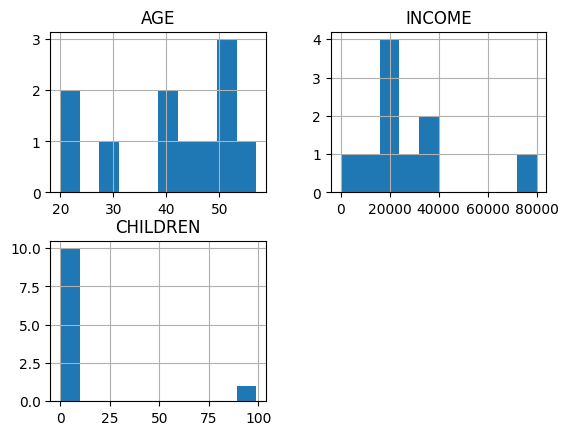

In [ ]:
#Show histograms. Describe any (unexpected) findings from the histograms
df.hist()

#AGE has no clear skewness, while INCOME and CHILDREN are right skewed (positively skewed). There is also an outlier for those two.

In [ ]:
#How many people have “good credit”?

df1['RESPONSE'].value_counts()

#Looks like there is a total of 700 people with good credit

,count
RESPONSE,
1,700
0,300


In [ ]:
#Some variables are not necessary for further analysis. Remove “TELEPHONE” variable

df1 = df1.drop('TELEPHONE', axis = 1)
df1.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,EDUCATION,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,0


In [ ]:
#Rename “EDUCATION” variable to “edu”

df1.rename(columns = {'EDUCATION': 'edu'}, inplace = True)
df1.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,edu,RETRAINING,AMOUNT,...,PROP_UNKN_NONE,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE
0,0,6,4,0,0,0,1,0,0,1169,...,0,67,0,0,1,2,2,1,0,1
1,1,48,2,0,0,0,1,0,0,5951,...,0,22,0,0,1,1,2,1,0,0
2,3,12,4,0,0,0,0,1,0,2096,...,0,49,0,0,1,1,1,2,0,1
3,0,42,2,0,0,1,0,0,0,7882,...,0,45,0,0,0,1,2,2,0,1
4,0,24,3,1,0,0,0,0,0,4870,...,1,53,0,0,0,2,2,2,0,0


In [ ]:
# Create a new column which is twice of the existing “AMOUNT” variable. And name the new column as “new_amount”

df1["new_amount"] = df1.AMOUNT * 2
df1.head()


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,edu,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE,new_amount
0,0,6,4,0,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,0,1,2338
1,1,48,2,0,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,11902
2,3,12,4,0,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,1,4192
3,0,42,2,0,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,1,15764
4,0,24,3,1,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,9740


In [ ]:
# For the “NEW_CAR” variable, replace 0 and 1 with false and true, respectively.

df1['NEW_CAR'] = df1['NEW_CAR'].map({0: 'false', 1: 'true'})
df1.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,edu,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE,new_amount
0,0,6,4,false,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,0,1,2338
1,1,48,2,false,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,11902
2,3,12,4,false,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,1,4192
3,0,42,2,false,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,1,15764
4,0,24,3,true,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,9740


In [ ]:
# Export the final data in csv (.csv) or excel (.xlsx) format with its name as “Q2_outcome.xlsx” if excel format is used

df1.to_excel("/content/drive/MyDrive/STAT_312/Homework/Q2_outcome.xlsx")

In [ ]:
#Filter rows using a criterion: filter a list of people whose loan amount is greater than 10,000

filtered_df1 = df1[df1['AMOUNT'] > 10000]
df1.head()

,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,edu,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE,new_amount
0,0,6,4,false,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,0,1,2338
1,1,48,2,false,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,11902
2,3,12,4,false,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,1,4192
3,0,42,2,false,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,1,15764
4,0,24,3,true,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,9740


In [ ]:
# Filter rows using two criteria: filter a list of people whose loan amount is greater than 10,000 and whose age is less than 25
filtered2_df1 = df1.loc[df1['AMOUNT'] > 10000 & (df1['AGE'] < 25)]
df1.head()


,CHK_ACCT,DURATION,HISTORY,NEW_CAR,USED_CAR,FURNITURE,RADIO/TV,edu,RETRAINING,AMOUNT,...,AGE,OTHER_INSTALL,RENT,OWN_RES,NUM_CREDITS,JOB,NUM_DEPENDENTS,FOREIGN,RESPONSE,new_amount
0,0,6,4,false,0,0,1,0,0,1169,...,67,0,0,1,2,2,1,0,1,2338
1,1,48,2,false,0,0,1,0,0,5951,...,22,0,0,1,1,2,1,0,0,11902
2,3,12,4,false,0,0,0,1,0,2096,...,49,0,0,1,1,1,2,0,1,4192
3,0,42,2,false,0,1,0,0,0,7882,...,45,0,0,0,1,2,2,0,1,15764
4,0,24,3,true,0,0,0,0,0,4870,...,53,0,0,0,2,2,2,0,0,9740


In [ ]:
# Q3 import both datasets

df2 = pd.read_excel("/content/drive/MyDrive/STAT_312/Homework/customer.xls")

print(df2)
print('\n \n \n \n \n')

df3 = pd.read_excel("/content/drive/MyDrive/STAT_312/Homework/order.xls")
print(df3)

#the primary key would be CustommerID

   CustomerID FirstName  LastName                  Email        DOB  \
0           1      John     Smith   John.Smith@yahoo.com 1968-02-04   
1           2    Steven  Goldfish  goldfish@fishhere.net 1974-04-04   
2           3     Paula     Brown    pb@herowndomain.org 1978-05-24   
3           4     James     Smith     jim@supergig.co.uk 1980-02-10   

          Phone  
0  626 222-2222  
1  323 455-4545  
2  416 323-3232  
3  416 323-8888  

 
 
 
 

   CustomerID  Order_Id  OrderNo
0           3         1    77895
1           3         2    44678
2           1         3    22456
3           1         4    24562
4          15         5    34764


In [ ]:
# Perform inner join, left join, and right join. Discuss the results of the three types of join method

df2.merge(df3, on='CustomerID', how='inner')
#inner join cobines 2 df's based on common index, keeping only the rows where there is a match in both, so in this case: cust ID 0-3 is included, but not 4 since df2 doesnt have a 4



,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3,22456
1,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4,24562
2,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1,77895
3,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2,44678


In [ ]:
df2.merge(df3, on="CustomerID", how="left")

#merges 2 df's based on common index but only keeps rows from the left which is df2, so in this case: all non-matchong rows contain NaN

,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3.0,22456.0
1,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4.0,24562.0
2,2,Steven,Goldfish,goldfish@fishhere.net,1974-04-04,323 455-4545,NaN,NaN
3,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1.0,77895.0
4,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2.0,44678.0
5,4,James,Smith,jim@supergig.co.uk,1980-02-10,416 323-8888,NaN,NaN


In [ ]:
df2.merge(df3, on="CustomerID", how="right")

#merges 2 df's based on common index but only keeps rows from the right which is df3, so in this case: rows from the right df w/o a match contain NaN

,CustomerID,FirstName,LastName,Email,DOB,Phone,Order_Id,OrderNo
0,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,1,77895
1,3,Paula,Brown,pb@herowndomain.org,1978-05-24,416 323-3232,2,44678
2,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,3,22456
3,1,John,Smith,John.Smith@yahoo.com,1968-02-04,626 222-2222,4,24562
4,15,NaN,NaN,NaN,NaT,NaN,5,34764


In [ ]:
#Export the final data in csv (.csv) or excel (.xlsx) format with its name as “Q3_outcome.xlsx” if excel format is used.

df_new = df2.merge(df3, on="CustomerID", how="inner")
df_new.to_csv("/content/drive/MyDrive/STAT_312/Homework/Q3_outcome.csv")